Techniques for imbalance handling<br>
1- Under sampling majority class<br>
2- Over sampling minority class by duplication<br>
3- over sampling minority class using SMOTE<br>
4- Ensemble Method<br>
5- Focal loss(Gives more weightage to Minority)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4027,5590-YRFJT,Female,0,Yes,No,20,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.45,482.8,Yes
3360,0689-NKYLF,Male,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,83.20,1060.6,Yes
5609,4818-DRBQT,Male,0,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.15,2265.25,Yes
417,5249-QYHEX,Female,0,Yes,Yes,40,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1024.7,No
2752,4139-SUGLD,Male,0,Yes,Yes,31,No,No phone service,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),35.40,1077.5,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
df1 = df[df.TotalCharges!=' ']

In [14]:
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-15-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.TotalCharges.dtypes

dtype('float64')

Text(0, 0.5, 'No. of customers')

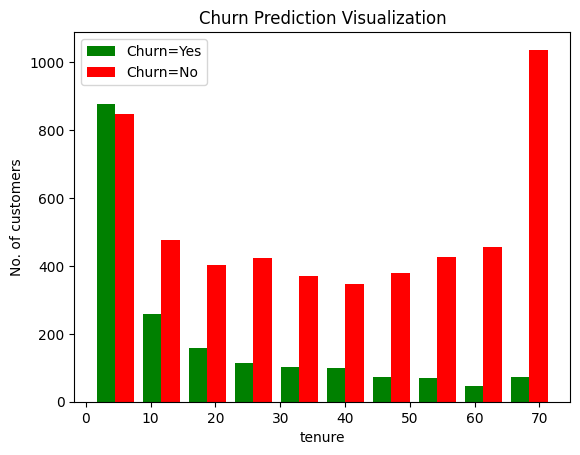

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes, tenure_churn_no],color=['green', 'red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.title("Churn Prediction Visualization")
plt.xlabel("tenure")
plt.ylabel("No. of customers")

Text(0, 0.5, 'No. of customers')

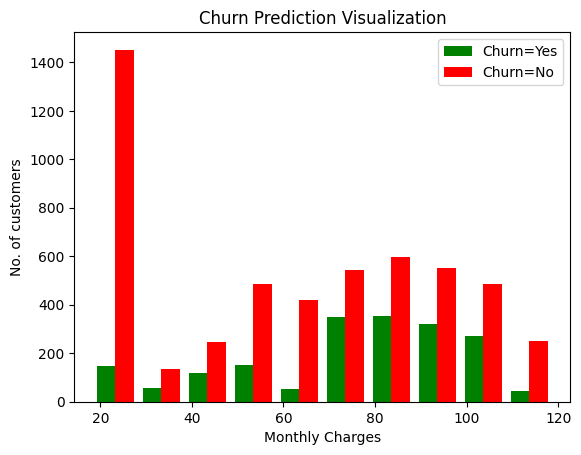

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no],color=['green', 'red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.title("Churn Prediction Visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("No. of customers")

In [19]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col} : unique values -> {df[col].unique()}")

In [20]:
print_unique_col_values(df1)

gender : unique values -> ['Female' 'Male']
Partner : unique values -> ['Yes' 'No']
Dependents : unique values -> ['No' 'Yes']
PhoneService : unique values -> ['No' 'Yes']
MultipleLines : unique values -> ['No phone service' 'No' 'Yes']
InternetService : unique values -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique values -> ['No' 'Yes' 'No internet service']
OnlineBackup : unique values -> ['Yes' 'No' 'No internet service']
DeviceProtection : unique values -> ['No' 'Yes' 'No internet service']
TechSupport : unique values -> ['No' 'Yes' 'No internet service']
StreamingTV : unique values -> ['No' 'Yes' 'No internet service']
StreamingMovies : unique values -> ['No' 'Yes' 'No internet service']
Contract : unique values -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique values -> ['Yes' 'No']
PaymentMethod : unique values -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique values -> ['No' 'Yes']


In [21]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

<ipython-input-21-d585b526d196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
<ipython-input-21-d585b526d196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [22]:
print_unique_col_values(df1)

gender : unique values -> ['Female' 'Male']
Partner : unique values -> ['Yes' 'No']
Dependents : unique values -> ['No' 'Yes']
PhoneService : unique values -> ['No' 'Yes']
MultipleLines : unique values -> ['No' 'Yes']
InternetService : unique values -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique values -> ['No' 'Yes']
OnlineBackup : unique values -> ['Yes' 'No']
DeviceProtection : unique values -> ['No' 'Yes']
TechSupport : unique values -> ['No' 'Yes']
StreamingTV : unique values -> ['No' 'Yes']
StreamingMovies : unique values -> ['No' 'Yes']
Contract : unique values -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique values -> ['Yes' 'No']
PaymentMethod : unique values -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique values -> ['No' 'Yes']


In [23]:
yes_no_columns = df1.columns[df1.nunique() == 2]
yes_no_columns = yes_no_columns.drop(['gender','SeniorCitizen'])

In [24]:
yes_no_columns.shape

(12,)

In [25]:
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)

<ipython-input-25-e966fe1492ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)
<ipython-input-25-e966fe1492ba>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes' : 1, 'No': 0},inplace=True)
<ipython-input-25-e966fe1492ba>:2:

In [26]:
for col in df1:
    print(df1[col].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [27]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace= True)

<ipython-input-27-b055e5e7e6af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0},inplace= True)
<ipython-input-27-b055e5e7e6af>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female': 1, 'Male': 0},inplace= True)
<ipython-input

In [28]:
df1['gender'].unique()

array([1, 0])

In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2495,1,0,1,0,38,1,0,0,0,0,...,False,False,True,False,True,False,False,True,False,False
746,0,1,1,1,72,1,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
368,0,0,1,0,71,1,1,0,0,1,...,False,True,False,False,True,False,False,True,False,False


In [31]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2525,0,0,1,1,1.000000,1,1,1,1,0,...,False,True,False,False,False,True,False,True,False,False
2015,1,0,1,1,0.380282,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
279,1,0,0,0,0.056338,1,0,0,1,0,...,True,False,False,True,False,False,True,False,False,False


In [36]:
X = df2.drop('Churn', axis=1)
X = X.astype('float64')
y = df2['Churn']
y = y.astype('float64')

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
len(X_train.columns)

26

In [39]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report


In [40]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    if weights == -1:
      model.fit(X_train, y_train, epochs=100)
    else:
      model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds=np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7053 - loss: 0.5651
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4224
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4374
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.3968
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4124
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.4105
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 0.4070
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.4090
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4147
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4141
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7972 - loss: 0.4199
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [43]:
y_test.value_counts()

,count
Churn,
0.0,999
1.0,408


**Undersampling Majority**

In [44]:
#Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [45]:
count_class_0, count_class_1

(5163, 1869)

In [47]:
df_class_0_under = df_class_0.sample(count_class_1)

In [49]:
df_test_under = pd.concat([df_class_0_under,df_class_1], axis=0)

In [50]:
df_test_under.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [65]:
X2= df_test_under.drop('Churn', axis=1)
y2 = df_test_under['Churn']


In [54]:
from sklearn.model_selection import train_test_split
X_train2,X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=15, stratify=y2)

In [56]:
y_train2.value_counts()

,count
Churn,
0,1495
1,1495


In [57]:
y_preds2 = ANN(X_train2, y_train2, X_test2, y_test2, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5747 - loss: 0.6922
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7524 - loss: 0.5355
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.5030
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.4995
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.4821
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4678
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.4680
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4593
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.4762
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.4752
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7704 - loss: 0.4733
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - l

**Method2: Oversampling**

In [58]:
count_class_0, count_class_1

(5163, 1869)

In [60]:
df_class_1.sample(5163,replace=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4329,1,0,1,1,0.225352,1,1,1,0,1,...,False,True,False,True,False,False,False,False,True,False
2428,0,0,0,1,0.521127,1,1,0,0,1,...,False,True,False,True,False,False,True,False,False,False
5702,0,1,1,1,0.985915,1,1,1,1,0,...,False,True,False,True,False,False,False,True,False,False
4613,1,1,0,0,0.746479,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
2573,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,0,0,0,0,0.352113,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3241,0,0,0,0,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
2761,1,1,0,0,0.126761,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4230,0,0,0,0,0.140845,1,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False


In [63]:
df_final_over = pd.concat([df_class_0,df_class_1.sample(count_class_0,replace=True)], axis=0)
df_final_over.Churn.value_counts()

,count
Churn,
0,5163
1,5163


In [67]:
X3= df_final_over.drop('Churn', axis=1)
y3 = df_final_over['Churn']

from sklearn.model_selection import train_test_split
X_train3,X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=15, stratify=y3)

In [68]:
y_train3.value_counts()

,count
Churn,
1,4130
0,4130


In [69]:
y_preds2 = ANN(X_train3, y_train3, X_test3, y_test3, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6593 - loss: 0.6175
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.4861
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7658 - loss: 0.4816
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7655 - loss: 0.4770
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7694 - loss: 0.4768
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4607
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7856 - loss: 0.4566
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7907 - loss: 0.4440
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7732 - loss: 0.4653
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7874 - loss: 0.4500
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.4443
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**Method3: SMOTE**

In [73]:
X4= df2.drop('Churn', axis=1)
y4 = df2['Churn']

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X4, y4)

y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [74]:
from sklearn.model_selection import train_test_split
X_train4,X_test4, y_train4, y_test4 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [75]:
y_preds3 = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6740 - loss: 0.5986
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7763 - loss: 0.4641
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7775 - loss: 0.4608
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4481
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.4543
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7913 - loss: 0.4351
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4225
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4388
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4312
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4292
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.4069
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [77]:
y_train4.value_counts()

,count
Churn,
1,4130
0,4130


**Method4: Use of Ensemble with undersampling**

In [78]:
X5 = df2.drop('Churn', axis=1)
y5 = df2['Churn']

from sklearn.model_selection import train_test_split
X_train5,X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=15, stratify=y5)

In [80]:
df3=X_train5.copy()
df3['Churn']=y_train5

In [82]:
df3_class0 =df3[df3.Churn==0]
df3_class1 =df3[df3.Churn==1]
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [83]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority],axis=0)

  X_train = df_train.drop('Churn', axis=1)
  y_train = df_train['Churn']

  return X_train, y_train

In [85]:
X_train6, y_train6 = get_train_batch(df3_class0, df3_class1, 0, 1495)
X_train6.shape, y_train6.shape

((2990, 26), (2990,))

In [89]:
y_preds6 = ANN(X_train6, y_train6, X_test5, y_test5, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6210 - loss: 0.6526
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.5218
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4980
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.4793
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7826 - loss: 0.4738
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7657 - loss: 0.4837
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7748 - loss: 0.4756
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7715 - loss: 0.4737
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.4712
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.4755
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4622
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - lo

In [87]:
X_train7, y_train7 = get_train_batch(df3_class0, df3_class1, 1495, 2990)
X_train7.shape, y_train7.shape

((2990, 26), (2990,))

In [90]:
y_preds7 = ANN(X_train7, y_train7, X_test5, y_test5, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6139 - loss: 0.6617
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7446 - loss: 0.5405
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7599 - loss: 0.4990
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 0.4949
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 0.4698
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.4858
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.4569
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7712 - loss: 0.4671
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4679
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.4774
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.4525
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [91]:
X_train8, y_train8 = get_train_batch(df3_class0, df3_class1, 2990, 4130)
X_train8.shape, y_train8.shape
y_preds8 = ANN(X_train8, y_train8, X_test5, y_test5, 'binary_crossentropy', -1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4985 - loss: 0.7427
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7404 - loss: 0.5674
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.5089
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.4874
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4827
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4623
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746 - loss: 0.4749
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4782
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.4679
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7759 - loss: 0.4753
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4605
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - l

In [93]:
y_pred_final = y_preds6.copy()

for i in range(len(y_preds6)):
  n_ones = y_preds6[i] + y_preds7[i] + y_preds8[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [94]:
print(classification_report(y_test5, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1033
           1       0.46      0.77      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.77      0.70      0.71      1407

